In [1]:
import tensorflow as tf
from sklearn.svm import LinearSVC

# 1. Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Data preprocessing: Normalize values between 0 and 1 by dividing by 255
x_train, x_test = x_train / 255.0, x_test / 255.0

# 2. Build the model
model = tf.keras.models.Sequential(
    [
        # Flatten 28px * 28px images into a 1D array
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        # Dense layer with 512 neurons. Uses ReLU activation function.
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        # Dense layer with 10 neurons. Uses softmax activation function.
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)

# 4. Compile the model. Use Adam Optimizer to minimize the loss.
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# 5. Train the model. Epochs determine the number of training iterations. This case iterates 5 times. 
model.fit(x_train, y_train, epochs=5)

# 6. Evaluate accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8997 - loss: 0.3424
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9738 - loss: 0.0839
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9846 - loss: 0.0493
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9892 - loss: 0.0340
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9919 - loss: 0.0257
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9779 - loss: 0.0731
Test accuracy: 0.9804999828338623


In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix

# 7. Perform predictions on the test data
y_pred = np.argmax(model.predict(x_test), axis=1)

# 8. Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[ 970    0    1    0    1    1    3    1    2    1]
 [   0 1123    2    0    0    1    2    1    6    0]
 [   3    1 1014    2    1    0    2    3    6    0]
 [   1    0    5  989    0    6    0    0    3    6]
 [   2    1    3    0  965    0    1    0    1    9]
 [   2    0    0   12    0  872    2    1    2    1]
 [   3    2    1    1    7    2  940    0    2    0]
 [   1    1   13    1    1    0    0 1002    3    6]
 [   3    0    2    7    3    2    2    2  950    3]
 [   2    3    0    7    6    2    0    4    5  980]]


In [5]:
# Extract the values for True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN) from the confusion matrix
TP = conf_matrix[0][0]
FP = conf_matrix[0][1]
TN = conf_matrix[1][0]
FN = conf_matrix[1][1]

print("TP=", TP, " FP=", FP, " TN=", TN, " FN=", FN)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall / Sensitivity / True Positive Rate 
recall = TP / (TP + FN)

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the calculated Precision, Recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

TP= 970  FP= 0  TN= 0  FN= 1123
Precision: 1.0
Recall: 0.4634495938843765
F1-score: 0.6333659810643161


c:\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


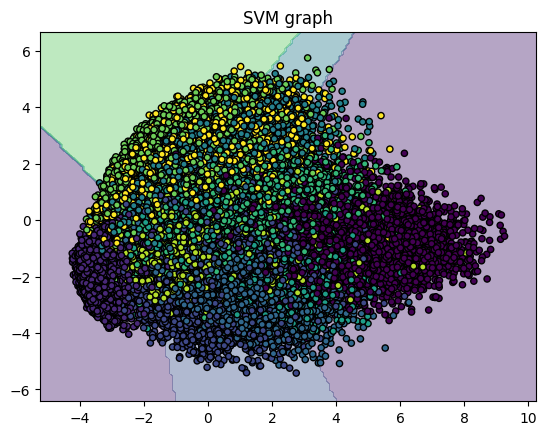

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Reduce the data to 2 dimensions
pca = PCA(n_components=2)
x_train_2d = pca.fit_transform(x_train.reshape((x_train.shape[0], -1)))

# Define the LinearSVC model
svm_model = LinearSVC()

# Train the SVM model
svm_model.fit(x_train_2d, y_train)

# Visualize the decision boundary of the trained SVM model
x_min, x_max = x_train_2d[:, 0].min() - 1, x_train_2d[:, 0].max() + 1
y_min, y_max = x_train_2d[:, 1].min() - 1, x_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the decision boundary
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the graph
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x_train_2d[:, 0], x_train_2d[:, 1], c=y_train, s=20, edgecolor="k")
plt.title("SVM graph")
plt.show()